In [33]:
# Importando as bibliotecas gerais:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expit


# Importando as bibliotecas Scikit Learn:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
# Definindo os centros:
centers = [[-5, 0], [0, 1.5], [5, -1]]

# Criando o dataset:
x, y = make_blobs(n_samples=1000, centers=centers, random_state=42)

In [35]:
x

array([[ 6.02406253, -0.40747305],
       [ 6.66125921, -1.45709626],
       [-6.60748323,  0.18463386],
       ...,
       [-0.0376347 ,  2.60330188],
       [ 4.02834327, -2.37961816],
       [ 1.57957215,  0.97713997]])

In [36]:
y

array([2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1,
       0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0,
       2, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2,
       0, 2, 1, 1, 0, 1, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2,

In [37]:
dataset = pd.read_csv('threeConcentricClasses.csv')

In [38]:
x = dataset.iloc[0:,:2].values
y = dataset.iloc[:,2].values

In [39]:
x

array([[ 0.05386771,  0.03156967],
       [-0.01079006,  0.08015841],
       [ 0.0340545 , -0.28709825],
       ...,
       [ 0.77982517, -0.0533621 ],
       [ 0.81592641,  0.01563564],
       [ 0.83156039,  0.06575711]])

In [40]:
x_test

array([[ 1.        , -0.9310184 , -0.32943812],
       [ 1.        , -0.06777435,  0.01316972],
       [ 1.        ,  0.10216864,  1.00139724],
       ...,
       [ 1.        ,  0.04408447, -0.03685523],
       [ 1.        ,  0.77844593,  0.29649223],
       [ 1.        , -0.94443002, -0.34896536]])

In [41]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

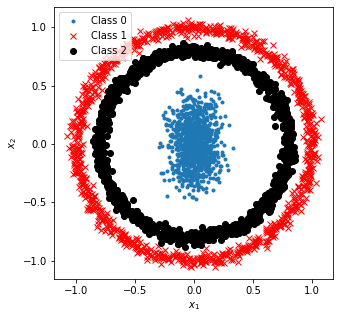

In [42]:
# Definindo os índices:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

# Plotando a figura:
fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.plot(x[idx2,0], x[idx2,1], 'ko', label='Class 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [43]:
def to_one_hot(y):
  n_classes = y.max() + 1
  m = len(y)
  Y_one_hot = np.zeros((m, n_classes))
  Y_one_hot[np.arange(m), y] = 1
  return Y_one_hot

def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

def error_function(x, a, y, epsilon=1e-7):
  logits = x.dot(a)
  y_prob = softmax(logits)
  error = -np.mean(np.sum(y * np.log(y_prob + epsilon), axis=1))
  return error


def classifier(x, a):
    logits = x.dot(a)
    y_prob = softmax(logits)
    c = np.zeros((len(y_prob), 1))
    for i in range(0, len(y_prob)):
        c[i, 0] = np.argwhere(y_prob[i,:] == y_prob[i,:].max())[0]
    return c

def predict_prob(x, a):
    logits = x.dot(a)
    y_prob = softmax(logits)
    h1 = y_prob
    h0 = 1 - h1
    h = np.c_[h0, h1]
    return h

In [52]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=23)

x_train = np.c_[np.ones((len(y_train), 1)), x_train, np.square(x_train[:,0]), np.square(x_train[:,1])]

x_test = np.c_[np.ones((len(y_test), 1)), x_test, np.square(x_test[:,0]), np.square(x_test[:,1])]

y_orig  = y_test

y_test  = to_one_hot(y_test)

y_train = to_one_hot(y_train) 

In [58]:
# Batch gradient descent solution.

# learning rate.
alpha = 2
# Maximum number of iterations.
n_iterations = 2000

# Random initialization of parameters.
a = np.random.randn(x_train.shape[1],1)

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd_v = np.zeros(n_iterations+1)

# Calculate initial error.
Jgd[0] = error_function(x_train, a, y_train)
Jgd_v[0] = error_function(x_test, a, y_test)

# Batch gradient-descent loop.
minimum_val_error = float("inf")
iteration = 0
error = 1
while iteration < n_iterations:
    gradients = -1/len(y_train)*x_train.T.dot(y_train - expit(x_train.dot(a)) )
    a = a - alpha * gradients
    Jgd[iteration+1] = error_function(x_train, a, y_train)
    Jgd_v[iteration+1] = error_function(x_test, a, y_test)
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    # Store weights for the smallest error ever.
    if(Jgd_v[iteration+1] < minimum_val_error):
        minimum_val_error = Jgd_v[iteration+1]
        a_min = a        
    iteration = iteration + 1

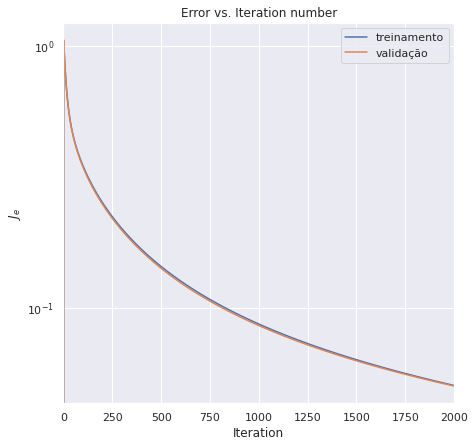

In [59]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration], label='treinamento')
plt.plot(np.arange(0, iteration), Jgd_v[0:iteration], label='validação')
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.legend()
plt.show()

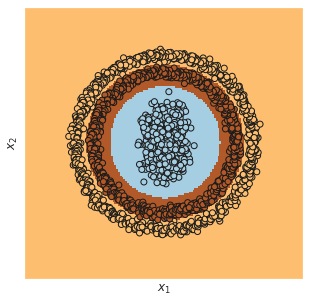

In [60]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifier(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel(),  np.square(xx.ravel()), np.square(yy.ravel())], a_min)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

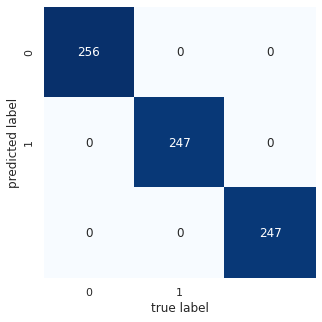

In [61]:
y_pred_class = classifier(x_test, a_min)

# Plot the confusion matrix
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_orig, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()